Contents:
<ul>
    <li><a href="#intro"> Introducation </a></li>
    <li><a href="#Wrangling">Data Wrangling </a></li>
    <li><a href="#exp">Exploratory</a></li>
    <li><a href="#conc">Conclusion&limitations </a></li>
</ul>

<a id="intro"></a>
## Introduction

<br>
Here we will show show why many people aren't came to the clinic after their reservations dependent on the available data we will see many factors reflect on this issue , let's begin.<p>

 - This [dataset](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv) consists of information of about 100k medical appointments in Brazil. The main focus of the dataset is whether the patients showed up for their appointments or not. The dataset consists of 14 columns:
--------------------------------
|Column  | 	Description
|:------------- | :-------------
|PatientId | Identification of a patient
|AppointmentID  | Identification of each appointment
|Gender | 	Male or Female.
|ScheduledDay | what day the patient set up their appointment.
|AppointmentDay | The day of the actuall appointment, when they have to visit the doctor.
|Age	 | How old is the patient.
|Neighbourhood | indicates the location of the hospital.
|Scholarship	 | Medical Scholarship (True of False)
|Hipertension | True of False
|Diabetes | True of False
|Alcoholism | True of False
|Handcap | True of False
|SMS_received | messages sent to the patient.
|No-show | Patients who attended or missed their appointment (Yes = Attended ; No = Missed)
    
    
First lets check the questions will answer below:<br>
<ul>
    <li><a href="#Q1"> 1- Is the gender effect on the oppointment ??</a></li>
    <li><a href="#Q2"> 2- Is waiting time affect the attending the appointment ??</a></li>
    <li><a href="#Q3"> 3- Is age affect on attendance?</a></li>
    <li><a href="#Q4"> 4-  Is the place is affected on their appointments?</a></li>
    <li><a href="#Q5"> 5- Is the diseases effect on the attendance?</a></li>
    <li><a href="#Q6"> 6- SMS sending effects.
</ul>

<a id="Wrangling"></a>

## Data Wrangling

In [1]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# get the data and show part of it
df=pd.read_csv("/kaggle/input/noshowappointments/KaggleV2-May-2016.csv")
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [3]:
# remove unused data
df.drop(["PatientId","AppointmentID"],axis=1,inplace=True)

In [4]:
# connvert ScheduledDay & AppointmentDay into data
df["ScheduledDay"]=pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"]=pd.to_datetime(df["AppointmentDay"])

In [5]:
# make a new coulmn named waiting_time to clarify the waiting time for the patient
df['waiting_time']=(df['AppointmentDay']-df['ScheduledDay']).dt.days+1

In [6]:
# show the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Neighbourhood   110527 non-null  object             
 5   Scholarship     110527 non-null  int64              
 6   Hipertension    110527 non-null  int64              
 7   Diabetes        110527 non-null  int64              
 8   Alcoholism      110527 non-null  int64              
 9   Handcap         110527 non-null  int64              
 10  SMS_received    110527 non-null  int64              
 11  No-show         110527 non-null  object             
 12  waiting_time    110527 non-null  int64              
dtypes: datetime64[

<a id="exp"></a>

## EDA

<a id="Q1"></a>

### Q1: Is the gender effect on the oppointment ??

<AxesSubplot:xlabel='Gender', ylabel='count'>

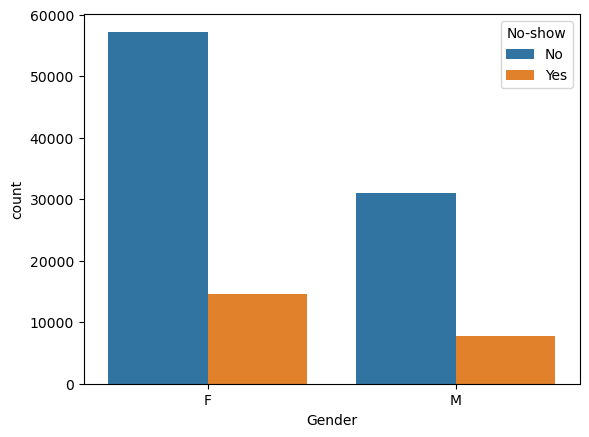

In [7]:
# by seaborn clarify how many male and female show up on the appointment
sns.countplot(data=df,x="Gender",hue="No-show")

In [8]:
att_f=df[(df["No-show"]=="Yes") & (df["Gender"]=="F")]["No-show"].count()
noatt_f=df[(df["No-show"]=="No") & (df["Gender"]=="F")]["No-show"].count()
att_m=df[(df["No-show"]=="Yes") & (df["Gender"]=="M")]["No-show"].count()
noatt_m=df[(df["No-show"]=="No") & (df["Gender"]=="M")]["No-show"].count()
print("The percentage of female attend {}% of all female".format(round(att_f/(att_f+noatt_f)*100,2)))
print("The percentage of male attend {}% of all male".format(round(att_m/(att_m+noatt_m)*100,2)))

The percentage of female attend 20.31% of all female
The percentage of male attend 19.97% of all male


#### As we can see above gender does not affect on the attendance.

<a id="Q2"></a>

### Q2: Is waiting time affect the attending the appointment ??

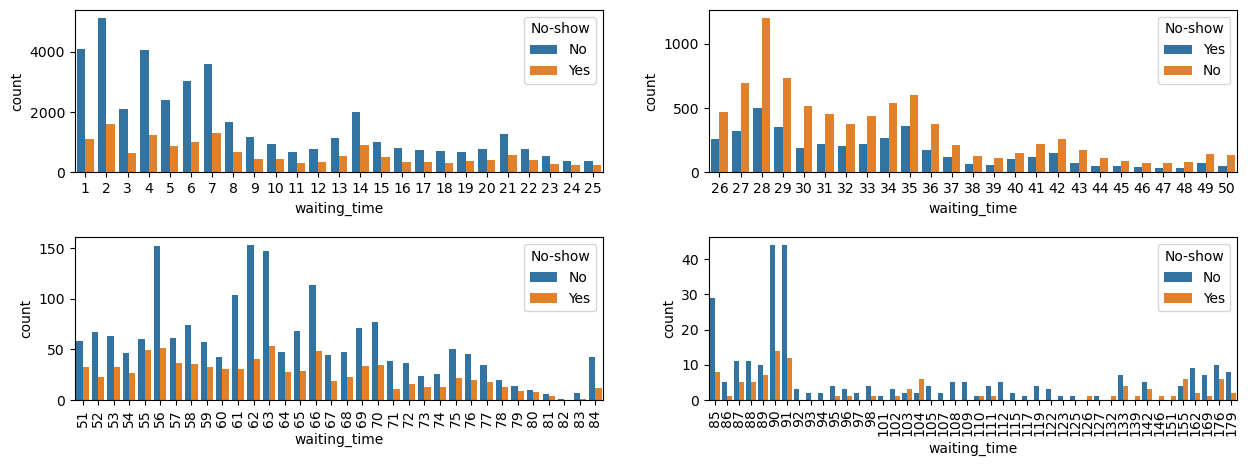

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,5))

sns.countplot(data=df[(df["waiting_time"] > 0) & (df["waiting_time"] <= 25)],
              x="waiting_time", hue="No-show", ax=axs[0,0])

sns.countplot(data=df[(df["waiting_time"] > 25) & (df["waiting_time"] <= 50)],
              x="waiting_time", hue="No-show", ax=axs[0,1])

sns.countplot(data=df[(df["waiting_time"] > 50) & (df["waiting_time"] < 85)],
              x="waiting_time", hue="No-show" ,ax=axs[1,0])

sns.countplot(data=df[df["waiting_time"] >= 85],
              x="waiting_time", hue="No-show", ax=axs[1,1], orient="h")

axs[1,0].tick_params(axis='x', labelrotation=90)
axs[1,1].tick_params(axis='x', labelrotation=90)

fig.subplots_adjust(bottom=0.1, hspace=0.4)

plt.show()

##### As we see above the waiting time is not affect attending the appointment.

<a id="Q3"></a>

### Q3: Is age affect attendance?

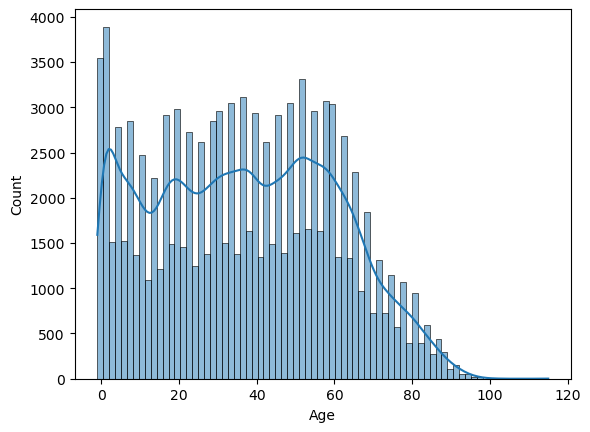

In [10]:
sns.histplot(df["Age"],kde=True)
plt.show();

In [11]:
df["Age_average"]=df["Age"].apply(lambda x: "age 1-20" if (x>0)&(x<=20) 
                                  else ("age 21-40" if (x>20)&(x<=40) 
                                  else ("age 41-60" if (x>40)&(x<=60) 
                                  else "age >60")))

<AxesSubplot:xlabel='Age_average', ylabel='count'>

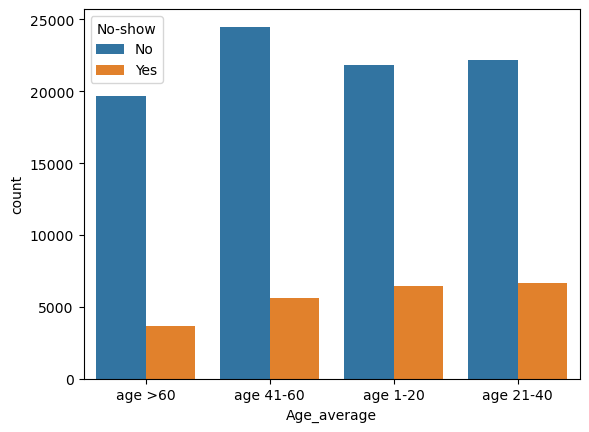

In [12]:
sns.countplot(data=df,x="Age_average",hue="No-show")

In [13]:
def normalized(feature):
    counts=df.groupby([feature,"No-show"])["No-show"].size()
    sums = counts.groupby(level=0).transform('sum')
    normalized_counts = counts / sums
    return normalized_counts
normalized("Age_average")

Age_average  No-show
age 1-20     No         0.771910
             Yes        0.228090
age 21-40    No         0.770210
             Yes        0.229790
age 41-60    No         0.814135
             Yes        0.185865
age >60      No         0.843576
             Yes        0.156424
Name: No-show, dtype: float64

##### As a result above age is now affect

<a id="Q4"></a>

### Q4: Is the place is affected on their appointments?

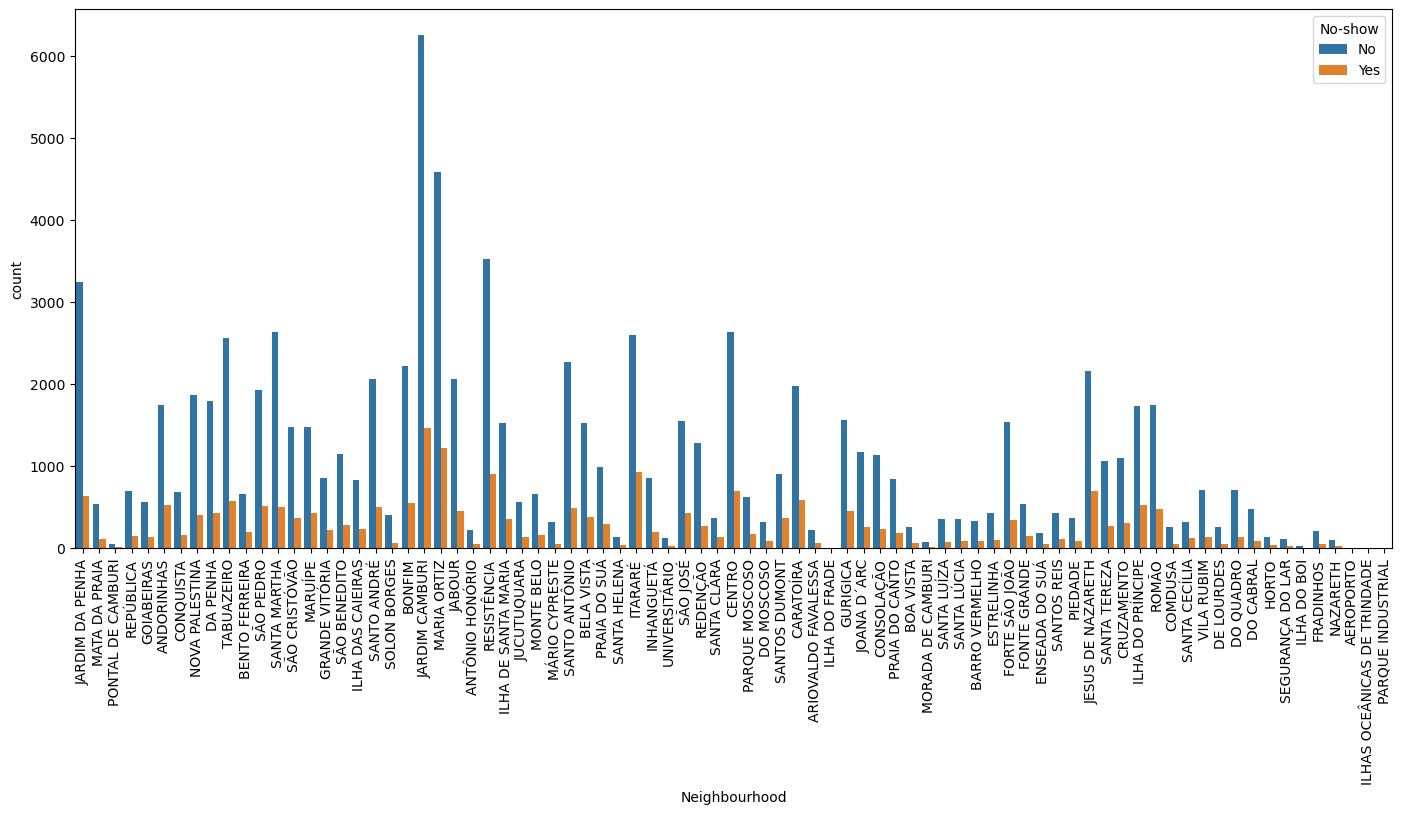

In [14]:
plt.figure(figsize=(17,7))
sns.countplot(data=df,x="Neighbourhood",hue="No-show")
plt.tick_params(axis='x', labelrotation=90)

In [16]:
#Use the above function to explore the precentage of the showup by Neighbourhood
normalized_fuc=normalized("Neighbourhood")
# filter only the show people
normalized_fuc.loc[normalized_fuc.index.get_level_values("No-show") == "Yes"].sort_values(ascending=False)

Neighbourhood                No-show
ILHAS OCEÂNICAS DE TRINDADE  Yes        1.000000
SANTOS DUMONT                Yes        0.289185
SANTA CECÍLIA                Yes        0.274554
SANTA CLARA                  Yes        0.264822
ITARARÉ                      Yes        0.262664
                                          ...   
DE LOURDES                   Yes        0.154098
SOLON BORGES                 Yes        0.147122
MÁRIO CYPRESTE               Yes        0.145553
AEROPORTO                    Yes        0.125000
ILHA DO BOI                  Yes        0.085714
Name: No-show, Length: 80, dtype: float64

In [17]:
df["Neighbourhood"].value_counts().iloc[-5:]

ILHA DO BOI                    35
ILHA DO FRADE                  10
AEROPORTO                       8
ILHAS OCEÂNICAS DE TRINDADE     2
PARQUE INDUSTRIAL               1
Name: Neighbourhood, dtype: int64

#### as we can see above the most attend people in SANTOS DUMONT is around 29% only
* Take in consideration that ILHAS OCEÂNICAS DE TRINDADE has counted only 2 and they show up in the appointment so it is not a measurement.

<a id="Q5"></a>

### Q5: Is the diseases effect on the attendance?

<AxesSubplot:xlabel='Scholarship', ylabel='count'>

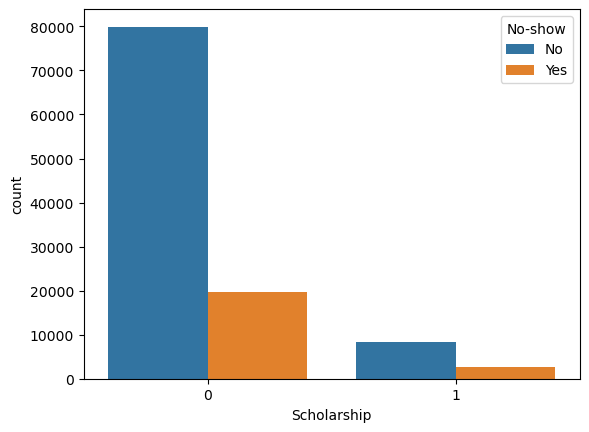

In [18]:
sns.countplot(data=df,x="Scholarship",hue="No-show")

In [19]:
normalized("Scholarship")

Scholarship  No-show
0            No         0.801928
             Yes        0.198072
1            No         0.762637
             Yes        0.237363
Name: No-show, dtype: float64

<a id="Q6"></a>

### Q6: SMS sending effects.

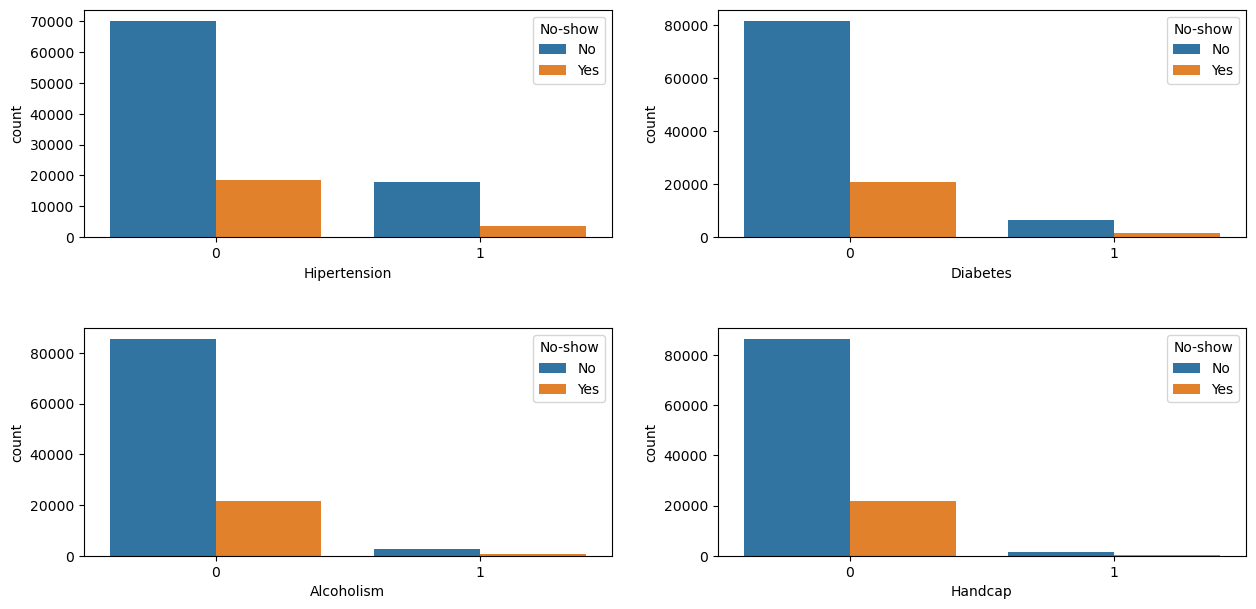

In [20]:
def diseases(x1,x2,x3,x4):
    fig,axs = plt.subplots(nrows=2,ncols=2, figsize=(15,7))
    sns.countplot(data=df,x=x1,hue="No-show",ax=axs[0,0])
    sns.countplot(data=df,x=x2,hue="No-show",ax=axs[0,1])
    sns.countplot(data=df,x=x3,hue="No-show",ax=axs[1,0])
    sns.countplot(data=df[df[x4]<2],x=x4,hue="No-show",ax=axs[1,1])
    fig.subplots_adjust(bottom=0.1, hspace=0.4)
    
diseases("Hipertension","Diabetes","Alcoholism","Handcap")

In [21]:
df["Handcap"]=df["Handcap"].apply(lambda x: 1 if x != 0 else 0)

def diseases_perc(diseases):
    x=normalized(diseases)
    result=x.loc[x.index.get_level_values("No-show") == "Yes"]
    return result
print(diseases_perc("Hipertension"))
print("*"*50)
print(diseases_perc("Diabetes"))
print("*"*50)
print(diseases_perc("Alcoholism"))
print("*"*50)
print(diseases_perc("Handcap"))

Hipertension  No-show
0             Yes        0.209037
1             Yes        0.173020
Name: No-show, dtype: float64
**************************************************
Diabetes  No-show
0         Yes        0.203628
1         Yes        0.180033
Name: No-show, dtype: float64
**************************************************
Alcoholism  No-show
0           Yes        0.201946
1           Yes        0.201488
Name: No-show, dtype: float64
**************************************************
Handcap  No-show
0        Yes        0.202353
1        Yes        0.181615
Name: No-show, dtype: float64


### Q6: SMSs effection

<AxesSubplot:xlabel='SMS_received', ylabel='count'>

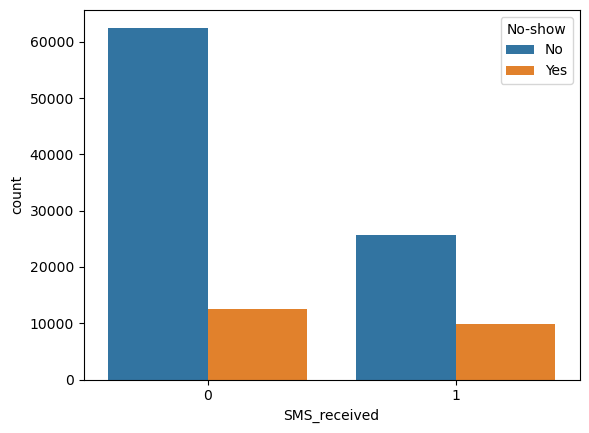

In [22]:
sns.countplot(data=df,x="SMS_received",hue="No-show")

In [23]:
normalized("SMS_received").loc[normalized("SMS_received").index.get_level_values("No-show") == "Yes"]

SMS_received  No-show
0             Yes        0.167033
1             Yes        0.275745
Name: No-show, dtype: float64

In [24]:
df["SMS_received"].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

<a id="conc"></a>

#### Conclusions
* According to the given data there are many factors may reflect to unshow the patient there appointment but as per the given data above the most reflected on nonshow the appointment is SMS there are only around 35K (32%) sms sent to the patient and arount 27.5% came on there appointment.

#### limitations:
* As we see the data given are not enough may if we have more features it can helps in the analysis such as medical insurance availability , farness of the clinic or the prices of the medical service regarding to the area.